# DL Assignment 9
## Sargun Singh (102115078) 4O1D

**Q1** *Analyze the use of tran_test_split class of Scikitlearn library and study the effects of different ratios of Training Data and Test data on the accuracy of a model.*

In [13]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [14]:
# Load the California Housing dataset
data = fetch_california_housing(as_frame=True)
X = data.data  # Features
y = data.target  # Target

In [15]:
# Define different train-test split ratios
split_ratios = [0.1, 0.2, 0.3, 0.4, 0.5]

# Store results for analysis
results = []

In [16]:
# Test the model for each split ratio
for test_size in split_ratios:
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Initialize and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate performance
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results.append((1 - test_size, test_size, rmse, r2))


In [19]:
# Display the results
results_df = pd.DataFrame(results, columns=["Train Size", "Test Size", "RMSE", "R2 Score"])
print(results_df)

   Train Size  Test Size      RMSE  R2 Score
0         0.9        0.1  0.747664  0.580835
1         0.8        0.2  0.745581  0.575788
2         0.7        0.3  0.728401  0.595770
3         0.6        0.4  0.737289  0.593940
4         0.5        0.5  0.728628  0.599464


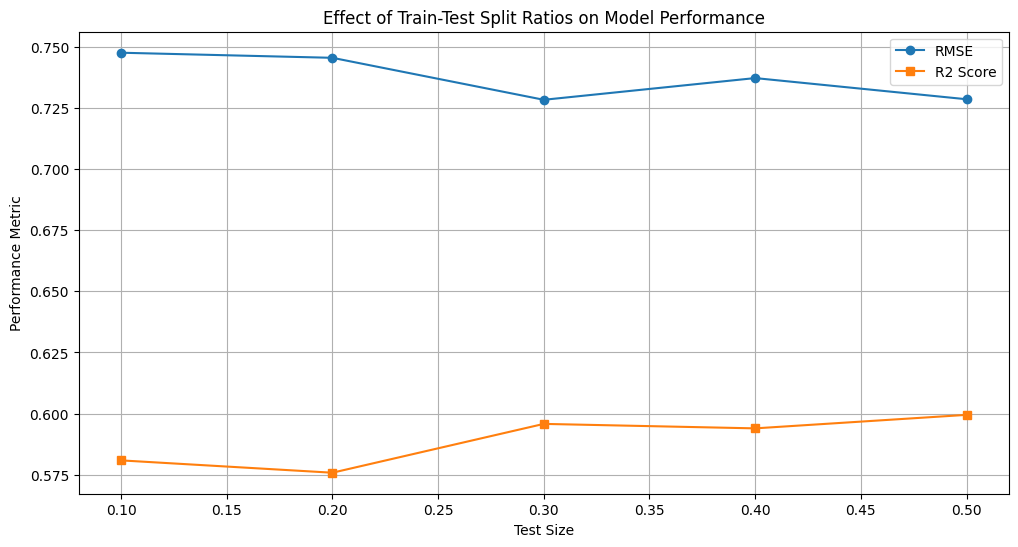

In [20]:
# Visualize the effect of train-test split ratios
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(results_df["Test Size"], results_df["RMSE"], marker='o', label='RMSE')
plt.plot(results_df["Test Size"], results_df["R2 Score"], marker='s', label='R2 Score')
plt.title("Effect of Train-Test Split Ratios on Model Performance")
plt.xlabel("Test Size")
plt.ylabel("Performance Metric")
plt.legend()
plt.grid(True)
plt.show()